In [1]:
# libraries for data manipulation
import pandas as pd
import numpy as np
# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
# reduction of the data dimensionality
from sklearn.decomposition import PCA
# variables scalation 
from sklearn.preprocessing import StandardScaler
# clustering libraries
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [2]:
File_to_work_with = '../Data/Proposed_structures_with_AI_caffeine_tanimoto_similarity_.xlsx'

In [3]:
initial = pd.read_excel(File_to_work_with)

In [4]:
initial.head()

,Unnamed: 0,new_SMILES,CID,PUBCHEM_SMILES,CN(C(N1C)=O)C2=C(N(C)C(SCCC)=N2)C1=O,CN(C(N1C)=O)C2=C(N(C)C(NCCCCCCN)=N2)C1=O,O=C1C2=C(N=C(NCCCCN3C(CCC3=O)=O)N2C)N(C)C(N1C)=O,CN(C(C(N(C)C(NCCCNCCCNCCCN)=N1)=C1N2C)=O)C2=O,O=C1C2=C(N=C(NCCCCN3C(C(C=CC=C4)=C4C3=O)=O)N2C)N(C)C(N1C)=O,O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CCCCCN=[N+]=[N-])N=N5)N2C)N(C)C(N1C)=O,...,CN(C(C(N(C)C(NCCCCNCCCN)=N1)=C1N2C)=O)C2=O,CN(C(N1C)=O)C2=C(N(C)C(SC(N3CCCC3)=S)=N2)C1=O,O=C1C2=C(N=C(NCCN3C(CCC3=O)=O)N2C)N(C)C(N1C)=O,CN(C(N1C)=O)C2=C(N(C)C(SCC(C)(C)C)=N2)C1=O,O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CC6=C(CN=[N+]=[N-])C=CC=C6)N=N5)N2C)N(C)C(N1C)=O,O=C1C2=C(N=C(NCCCCN3C(C=CC3=O)=O)N2C)N(C)C(N1C)=O,CN(C(N1C)=O)C2=C(N(C)C=N2)C1=O,O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CCCN=[N+]=[N-])N=N5)N2C)N(C)C(N1C)=O,CN(C(N1C)=O)C2=C(N(C)C(NCCCN)=N2)C1=O,CN1C(NCC/N=C2SCC(N/2)=O)=NC3=C1C(N(C)C(N3C)=O)=O
0,0,Cn1c(NCCCN=C2NC(=O)CS2)nc2c1n(C)c(=O)n2C,0,0,0.402496,0.537808,0.532088,0.548085,0.493402,0.399220,...,0.541455,0.414381,0.528226,0.404965,0.392745,0.528045,0.404484,0.401307,0.547170,0.605705
1,1,CN1CN=C(NCCCN=C2NC(=O)CS2)N(C)CN(C)C1=O,0,0,0.172633,0.180302,0.196018,0.187450,0.206338,0.193991,...,0.185127,0.187406,0.201070,0.172713,0.200631,0.194717,0.153203,0.194226,0.179283,0.256917
2,2,Cn1c(SC(=S)N2CCCC2)nc2c1n(C)c(=O)n2C=O,0,0,0.504092,0.418712,0.427724,0.418002,0.410048,0.442105,...,0.421374,0.616598,0.423841,0.502435,0.436629,0.424287,0.403846,0.437788,0.414110,0.407781
3,3,CN1Cc2c(n(C)c(=O)n(C)c2=O)C1NCC=CCCCN=N,0,0,0.428003,0.428383,0.447028,0.431489,0.479579,0.491667,...,0.430638,0.447217,0.447233,0.431878,0.497100,0.453085,0.378320,0.486905,0.427249,0.444586
4,4,CCN(C=O)C(=O)C=CN=C(NCCCN=C1NC(=O)CS1)N(C)C,0,0,0.160032,0.169781,0.191824,0.176136,0.194126,0.194370,...,0.174757,0.182168,0.198899,0.162097,0.198838,0.206436,0.146692,0.193809,0.169657,0.248181


In [5]:
initial = initial.columns.values.tolist()

In [6]:
initial

['Unnamed: 0',
 'new_SMILES',
 'CID',
 'PUBCHEM_SMILES',
 'CN(C(N1C)=O)C2=C(N(C)C(SCCC)=N2)C1=O',
 'CN(C(N1C)=O)C2=C(N(C)C(NCCCCCCN)=N2)C1=O',
 'O=C1C2=C(N=C(NCCCCN3C(CCC3=O)=O)N2C)N(C)C(N1C)=O',
 'CN(C(C(N(C)C(NCCCNCCCNCCCN)=N1)=C1N2C)=O)C2=O',
 'O=C1C2=C(N=C(NCCCCN3C(C(C=CC=C4)=C4C3=O)=O)N2C)N(C)C(N1C)=O',
 'O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CCCCCN=[N+]=[N-])N=N5)N2C)N(C)C(N1C)=O',
 'CN(C(C(N(C)C(NCCCNCCCN)=N1)=C1N2C)=O)C2=O',
 'CNCCN(C)C1=NC2=C(N(C(N(C2=O)C)=O)C)N1C',
 'CN(C(N1C)=O)C2=C(N(C)C(SC)=N2)C1=O',
 'O=C1C2=C(N=C(NCCCN3C(CCC3=O)=O)N2C)N(C)C(N1C)=O',
 'CN(C(N1C)=O)C2=C(N(C)C(NCCCCCN)=N2)C1=O',
 'CN1C(N(C)CCCN(C=C(/C=C(C(OC)=O)\\S)[N+]([O-])=O)C)=NC2=C1C(N(C)C(N2C)=O)=O',
 'CN(C(C(N(C)C(NCCNCCCNCCN)=N1)=C1N2C)=O)C2=O',
 'O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CC6=CC=CC(CN=[N+]=[N-])=C6)N=N5)N2C)N(C)C(N1C)=O',
 'CN(C(N1C)=O)C2=C(N(C)C(NCCCCN)=N2)C1=O',
 'O=C1C2=C(N=C(NCCN3C(C(C=CC=C4)=C4C3=O)=O)N2C)N(C)C(N1C)=O',
 'O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CC6=CC=C(CN=[N+]

In [7]:
initial = initial[4:]

In [8]:
initial

['CN(C(N1C)=O)C2=C(N(C)C(SCCC)=N2)C1=O',
 'CN(C(N1C)=O)C2=C(N(C)C(NCCCCCCN)=N2)C1=O',
 'O=C1C2=C(N=C(NCCCCN3C(CCC3=O)=O)N2C)N(C)C(N1C)=O',
 'CN(C(C(N(C)C(NCCCNCCCNCCCN)=N1)=C1N2C)=O)C2=O',
 'O=C1C2=C(N=C(NCCCCN3C(C(C=CC=C4)=C4C3=O)=O)N2C)N(C)C(N1C)=O',
 'O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CCCCCN=[N+]=[N-])N=N5)N2C)N(C)C(N1C)=O',
 'CN(C(C(N(C)C(NCCCNCCCN)=N1)=C1N2C)=O)C2=O',
 'CNCCN(C)C1=NC2=C(N(C(N(C2=O)C)=O)C)N1C',
 'CN(C(N1C)=O)C2=C(N(C)C(SC)=N2)C1=O',
 'O=C1C2=C(N=C(NCCCN3C(CCC3=O)=O)N2C)N(C)C(N1C)=O',
 'CN(C(N1C)=O)C2=C(N(C)C(NCCCCCN)=N2)C1=O',
 'CN1C(N(C)CCCN(C=C(/C=C(C(OC)=O)\\S)[N+]([O-])=O)C)=NC2=C1C(N(C)C(N2C)=O)=O',
 'CN(C(C(N(C)C(NCCNCCCNCCN)=N1)=C1N2C)=O)C2=O',
 'O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CC6=CC=CC(CN=[N+]=[N-])=C6)N=N5)N2C)N(C)C(N1C)=O',
 'CN(C(N1C)=O)C2=C(N(C)C(NCCCCN)=N2)C1=O',
 'O=C1C2=C(N=C(NCCN3C(C(C=CC=C4)=C4C3=O)=O)N2C)N(C)C(N1C)=O',
 'O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CC6=CC=C(CN=[N+]=[N-])C=C6)N=N5)N2C)N(C)C(N1C)=O',
 'O=C1C2=C(N=C(NCCN3C(

In [9]:
generated_smiles = pd.read_excel(File_to_work_with)

In [10]:
generated_smiles = generated_smiles['new_SMILES']

In [11]:
generated_smiles

0         Cn1c(NCCCN=C2NC(=O)CS2)nc2c1n(C)c(=O)n2C
1          CN1CN=C(NCCCN=C2NC(=O)CS2)N(C)CN(C)C1=O
2           Cn1c(SC(=S)N2CCCC2)nc2c1n(C)c(=O)n2C=O
3          CN1Cc2c(n(C)c(=O)n(C)c2=O)C1NCC=CCCCN=N
4      CCN(C=O)C(=O)C=CN=C(NCCCN=C1NC(=O)CS1)N(C)C
                          ...                     
341                     CN1CC2NCC=CC3=NC3(C1=O)N2C
342           CC1N(C)C(=O)N(C=O)CN2CC12NCC=CCCCN=N
343          CN1CN2C=C(C1=O)N(C=O)C(NCCCCNCCCN)=N2
344      CON1c2nc(NCCCNCCCNCCCN)[nH]c2C(=O)N(C)C1C
345       CON1C=C2NC(NCCCNCCCNCCCN)=NC1(C)N(C)C2=O
Name: new_SMILES, Length: 346, dtype: object

## Molecular descriptors to be used

In [12]:
from rdkit import Chem
from mordred import Calculator, descriptors, Lipinski
import mordred

In [13]:
descriptor1_initials = []
descriptor1_generated = []

descriptor2_initials = []
descriptor2_generated = []

descriptor3_initials = []
descriptor3_generated = []


In [14]:
mol_objs_ini = [Chem.MolFromSmiles(smi) for smi in initial]
mol_objs_gen = [Chem.MolFromSmiles(smi) for smi in generated_smiles]

In [15]:
calc = Calculator(descriptors, ignore_3D=True)
molecular_descriptors_initials = calc.pandas(mol_objs_ini)
molecular_descriptors_generated = calc.pandas(mol_objs_gen)

100%|████████████████████████████████████████████████████████████████████████████████| 346/346 [00:04<00:00, 69.61it/s]


In [16]:
molecular_descriptors_initials.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,13.658457,12.537408,0,0,22.669196,2.535529,4.964037,22.669196,1.259400,3.816969,...,9.986863,65.798368,268.099397,7.885276,568,32,94.0,115.0,7.888889,4.055556
1,16.486884,14.111207,0,1,27.746837,2.535628,4.964140,27.746837,1.261220,3.999750,...,10.032189,70.352988,308.196074,6.699915,1166,36,110.0,131.0,8.888889,5.055556
2,20.160317,16.996015,0,0,33.109109,2.535656,4.964170,33.109109,1.273427,4.189094,...,10.274603,77.368494,362.170253,7.545214,1892,44,138.0,167.0,10.222222,5.694444
3,20.022418,15.824963,0,3,34.031117,2.535628,4.964140,34.031117,1.260412,4.189389,...,10.086101,75.956798,380.264822,6.445166,2416,41,130.0,151.0,10.138889,6.305556
4,23.574531,18.765181,0,0,39.005624,2.535726,4.964239,39.005624,1.300187,4.344701,...,10.517510,82.685737,410.170253,7.887889,2810,55,164.0,202.0,10.944444,6.527778


In [17]:
molecular_descriptors_generated.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,17.941538,15.055799,0,2,29.379472,2.548000,4.763931,29.379472,1.277368,4.073424,...,10.043293,74.801912,337.132094,8.026955,1411,34,122.0,146.0,8.250000,5.027778
1,17.396191,14.095978,0,5,28.697174,2.314062,4.627688,28.697174,1.247703,4.035294,...,9.675897,70.002056,341.163394,7.416596,1427,33,112.0,126.0,8.527778,5.166667
2,16.377494,14.871227,0,0,26.773537,2.559616,4.811440,26.773537,1.274930,3.992977,...,10.073104,72.575136,325.066717,9.029631,916,34,114.0,140.0,7.750000,4.638889
3,17.193991,14.698177,0,2,28.912557,2.538260,4.972461,28.912557,1.257068,4.040669,...,10.048410,71.487918,320.196074,6.812682,1336,37,114.0,135.0,9.138889,5.305556
4,18.034348,15.639880,0,5,30.347189,2.240574,4.436851,30.347189,1.213888,4.084496,...,9.521568,71.720724,368.163060,7.513532,1955,30,112.0,122.0,9.916667,5.972222


In [18]:
def is_morder_missing(x):
    return np.nan if type(x) == mordred.error.Missing or type(x) == mordred.error.Error else x 

In [19]:
molecular_descriptors_initials = molecular_descriptors_initials.applymap(is_morder_missing)
molecular_descriptors_generated = molecular_descriptors_generated.applymap(is_morder_missing)

In [20]:
simple_preprocessing = True
if simple_preprocessing:
    molecular_descriptors_initials = molecular_descriptors_initials.dropna(axis=1, how='any')
    molecular_descriptors_generated = molecular_descriptors_generated.dropna(axis=1, how='any')

In [21]:
print(molecular_descriptors_initials.isna().sum().sum())
print(molecular_descriptors_generated.isna().sum().sum())
print(molecular_descriptors_initials.shape)
print(molecular_descriptors_generated.shape)

0
0
(58, 1388)
(346, 1375)


In [22]:
molecular_descriptors_initials = molecular_descriptors_initials.loc[:, (molecular_descriptors_initials != 0).any(axis=0)]
molecular_descriptors_generated = molecular_descriptors_generated.loc[:, (molecular_descriptors_generated != 0).any(axis=0)]

In [23]:
print(molecular_descriptors_initials.shape)
print(molecular_descriptors_generated.shape)

(58, 1137)
(346, 1219)


### Chosen descriptors:

-> "MW"

-> "Diameter"?

-> "SlogP"

-> "TopoPSA"

-> "WPol" -> the Wiener Polarity Number

-> "nRing" -> ring count

-> "AATS0Z" -> averaged moreau-broto autocorrelation of lag 0 weighted by atomic number

In [24]:
preserve_only_common_columns = []
for element in list(molecular_descriptors_initials.columns):
    if element in list(molecular_descriptors_generated.columns):
        preserve_only_common_columns.append(element)
    else:
        print("Not found in generated structures : ", element)

Not found in generated structures :  C4SP3
Not found in generated structures :  NaaS
Not found in generated structures :  SaaS
Not found in generated structures :  MAXsCH3
Not found in generated structures :  MAXaaaC
Not found in generated structures :  MAXaaN
Not found in generated structures :  MAXaasN
Not found in generated structures :  MINsCH3
Not found in generated structures :  MINaaaC
Not found in generated structures :  MINaaN
Not found in generated structures :  MINaasN
Not found in generated structures :  MDEC-11
Not found in generated structures :  MDEC-13
Not found in generated structures :  MDEC-33
Not found in generated structures :  MDEN-23
Not found in generated structures :  MDEN-33


In [25]:
len(preserve_only_common_columns)

1121

In [26]:
print(preserve_only_common_columns)

['ABC', 'ABCGG', 'nBase', 'SpAbs_A', 'SpMax_A', 'SpDiam_A', 'SpAD_A', 'SpMAD_A', 'LogEE_A', 'VE1_A', 'VE2_A', 'VE3_A', 'VR1_A', 'VR2_A', 'VR3_A', 'nAromAtom', 'nAromBond', 'nAtom', 'nHeavyAtom', 'nHetero', 'nH', 'nC', 'nN', 'nO', 'nS', 'ATS0dv', 'ATS1dv', 'ATS2dv', 'ATS3dv', 'ATS4dv', 'ATS5dv', 'ATS6dv', 'ATS7dv', 'ATS8dv', 'ATS0d', 'ATS1d', 'ATS2d', 'ATS3d', 'ATS4d', 'ATS5d', 'ATS6d', 'ATS7d', 'ATS8d', 'ATS0s', 'ATS1s', 'ATS2s', 'ATS3s', 'ATS4s', 'ATS5s', 'ATS6s', 'ATS7s', 'ATS8s', 'ATS0Z', 'ATS1Z', 'ATS2Z', 'ATS3Z', 'ATS4Z', 'ATS5Z', 'ATS6Z', 'ATS7Z', 'ATS8Z', 'ATS0m', 'ATS1m', 'ATS2m', 'ATS3m', 'ATS4m', 'ATS5m', 'ATS6m', 'ATS7m', 'ATS8m', 'ATS0v', 'ATS1v', 'ATS2v', 'ATS3v', 'ATS4v', 'ATS5v', 'ATS6v', 'ATS7v', 'ATS8v', 'ATS0se', 'ATS1se', 'ATS2se', 'ATS3se', 'ATS4se', 'ATS5se', 'ATS6se', 'ATS7se', 'ATS8se', 'ATS0pe', 'ATS1pe', 'ATS2pe', 'ATS3pe', 'ATS4pe', 'ATS5pe', 'ATS6pe', 'ATS7pe', 'ATS8pe', 'ATS0are', 'ATS1are', 'ATS2are', 'ATS3are', 'ATS4are', 'ATS5are', 'ATS6are', 'ATS7are', '

## Clustering issue

In [27]:
data_to_be_clustered = molecular_descriptors_initials[preserve_only_common_columns].append(molecular_descriptors_generated[preserve_only_common_columns])

C:\Users\aleks\AppData\Local\Temp\ipykernel_11688\3123629812.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_to_be_clustered = molecular_descriptors_initials[preserve_only_common_columns].append(molecular_descriptors_generated[preserve_only_common_columns])


In [28]:
data_to_be_clustered.shape

(404, 1121)

In [29]:
data_to_be_clustered.head()

,ABC,ABCGG,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,13.658457,12.537408,0,22.669196,2.535529,4.964037,22.669196,1.259400,3.816969,3.661340,...,9.986863,65.798368,268.099397,7.885276,568,32,94.0,115.0,7.888889,4.055556
1,16.486884,14.111207,1,27.746837,2.535628,4.964140,27.746837,1.261220,3.999750,3.681637,...,10.032189,70.352988,308.196074,6.699915,1166,36,110.0,131.0,8.888889,5.055556
2,20.160317,16.996015,0,33.109109,2.535656,4.964170,33.109109,1.273427,4.189094,3.711232,...,10.274603,77.368494,362.170253,7.545214,1892,44,138.0,167.0,10.222222,5.694444
3,20.022418,15.824963,3,34.031117,2.535628,4.964140,34.031117,1.260412,4.189389,3.682911,...,10.086101,75.956798,380.264822,6.445166,2416,41,130.0,151.0,10.138889,6.305556
4,23.574531,18.765181,0,39.005624,2.535726,4.964239,39.005624,1.300187,4.344701,3.819023,...,10.517510,82.685737,410.170253,7.887889,2810,55,164.0,202.0,10.944444,6.527778


In [30]:
data_to_be_clustered = data_to_be_clustered.reset_index()

In [31]:
data_to_be_clustered.shape

(404, 1122)

In [32]:
data_to_be_clustered = data_to_be_clustered.drop(columns=['index'])

In [33]:
data_to_be_clustered.shape

(404, 1121)

In [34]:
## normalization of data, the result can be obtianed without this step

In [35]:
data_to_be_clustered = (data_to_be_clustered - data_to_be_clustered.mean()) / data_to_be_clustered.std()

In [36]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(data_to_be_clustered)
df = pd.DataFrame(df_pca, columns=['c1', 'c2', 'c3'], index=data_to_be_clustered.index)

In [37]:
df.head()

,c1,c2,c3
0,-13.215509,-16.121609,3.447844
1,-2.025622,0.156002,-9.399457
2,9.956147,-10.303971,-8.731758
3,10.926331,11.424533,-10.261731
4,21.378835,-14.834987,-4.760465


In [38]:
PCA_names = pd.DataFrame(pca.components_,columns=data_to_be_clustered.columns,index = ['PC-1','PC-2','PC-3'])

In [39]:
PCA_names

,ABC,ABCGG,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
PC-1,0.051447,0.050999,-0.010900,0.051382,0.014688,0.012358,0.051382,0.026795,0.051166,0.032427,...,0.036070,0.045586,0.050517,0.013901,0.048019,0.047963,0.050991,0.049794,0.044850,0.050257
PC-2,0.001231,-0.002410,0.041052,0.004820,-0.041869,-0.040675,0.004820,-0.035333,0.000053,-0.013058,...,-0.039755,-0.015348,0.010135,-0.060716,0.015065,-0.016666,-0.007915,-0.016116,0.007905,0.016664
PC-3,0.005394,0.001443,-0.021924,0.005028,-0.019225,-0.022284,0.005028,0.016924,-0.004880,0.019985,...,-0.007941,-0.001071,0.011779,0.051701,0.014512,-0.003005,0.006341,0.005967,-0.021701,-0.000083


In [40]:
PCA_names_transposed = PCA_names.transpose()

In [41]:
PCA_names_transposed.head()

,PC-1,PC-2,PC-3
ABC,0.051447,0.001231,0.005394
ABCGG,0.050999,-0.002410,0.001443
nBase,-0.010900,0.041052,-0.021924
SpAbs_A,0.051382,0.004820,0.005028
SpMax_A,0.014688,-0.041869,-0.019225


In [42]:
max(PCA_names_transposed['PC-1']), min(PCA_names_transposed['PC-1'])

(0.051467897490024846, -0.05006606426841453)

In [43]:
#### Select three descriptors for data selection
PCA_names_transposed.loc[(PCA_names_transposed['PC-1'] == max(PCA_names_transposed['PC-1'])) 
                         | (PCA_names_transposed['PC-1'] == min(PCA_names_transposed['PC-1']))]

,PC-1,PC-2,PC-3
VE2_Dzp,-0.050066,-0.006658,0.012562
TMWC10,0.051468,-0.003184,0.002157


In [44]:
max(PCA_names_transposed['PC-2']), min(PCA_names_transposed['PC-2'])

(0.06539208776012842, -0.07451257913691128)

In [45]:
PCA_names_transposed.loc[(PCA_names_transposed['PC-2'] == max(PCA_names_transposed['PC-2'])) 
                         | (PCA_names_transposed['PC-2'] == min(PCA_names_transposed['PC-2']))]

,PC-1,PC-2,PC-3
AATSC0d,-0.000479,-0.074513,-0.001295
AXp-1d,-0.010558,0.065392,-0.014400


In [46]:
max(PCA_names_transposed['PC-3']), min(PCA_names_transposed['PC-3'])

(0.09680191367330372, -0.09794153620024798)

In [47]:
PCA_names_transposed.loc[(PCA_names_transposed['PC-3'] == max(PCA_names_transposed['PC-3'])) 
                         | (PCA_names_transposed['PC-3'] == min(PCA_names_transposed['PC-3']))]

,PC-1,PC-2,PC-3
AETA_alpha,-0.010391,0.008633,0.096802
ETA_dAlpha_B,0.008646,-0.008813,-0.097942


In [48]:
#### Already selected descriptors
descriptor1 = 'GATS3c'
descriptor2 = 'WPol'
descriptor3 = 'AATS0Z'

In [49]:
PCA_names[descriptor1] #best is MID (normal molecular id(sum of all atomic id))

PC-1    0.002407
PC-2   -0.030743
PC-3   -0.027713
Name: GATS3c, dtype: float64

In [50]:
PCA_names[descriptor2] #best is AATS2dv (averaged moreau-broto autocorrelation of lag 2 weighted by valence electrons)

PC-1    0.047963
PC-2   -0.016666
PC-3   -0.003005
Name: WPol, dtype: float64

In [51]:
PCA_names[descriptor3] #best is ETA_dPsi_A (https://mordred-descriptor.github.io/documentation/master/api/mordred.ExtendedTopochemicalAtom.html#mordred.ExtendedTopochemicalAtom.EtaDeltaPsi)

PC-1    0.002641
PC-2   -0.042223
PC-3    0.077338
Name: AATS0Z, dtype: float64

In [52]:
df.agg(['mean', 'median', 'std', 'min', 'max']).round(2)

,c1,c2,c3
mean,0.00,0.00,-0.00
median,-2.83,-0.49,-2.50
std,19.32,12.15,9.11
min,-40.33,-28.81,-15.14
max,66.75,35.58,27.43


C:\Users\aleks\AppData\Local\Temp\ipykernel_11688\540614336.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.c1, color = '#eb6c6a').set(title = 'Density plot - variable c1')


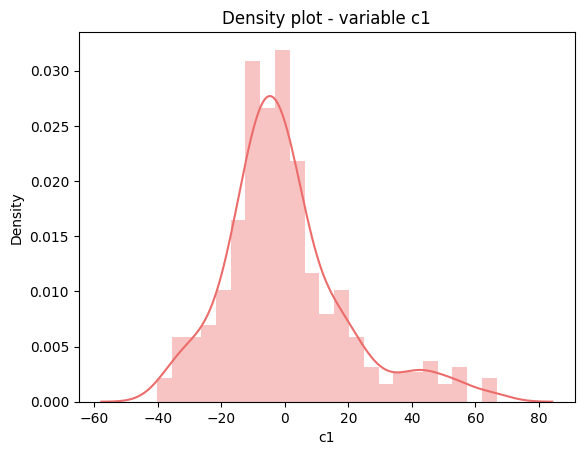

C:\Users\aleks\AppData\Local\Temp\ipykernel_11688\540614336.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.c2, color = '#eb6c6a').set(title = 'Density plot - variable c2')


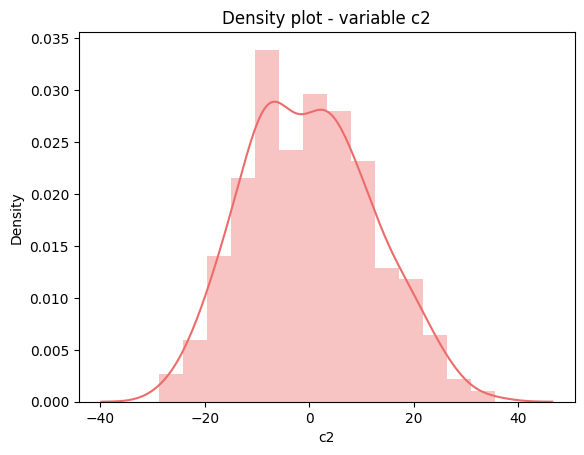

C:\Users\aleks\AppData\Local\Temp\ipykernel_11688\540614336.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.c3, color = '#eb6c6a').set(title = 'Density plot - variable c3')


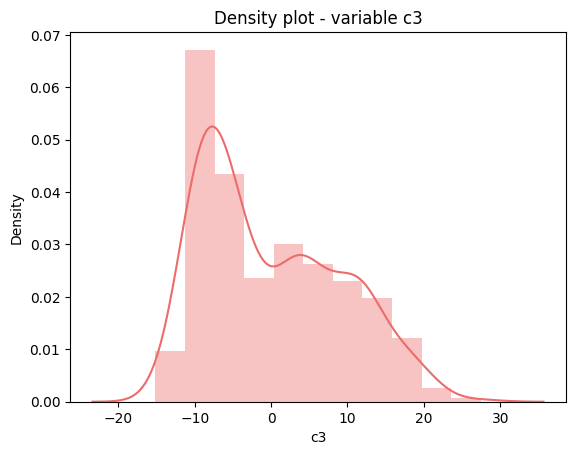

In [53]:
sns.distplot(df.c1, color = '#eb6c6a').set(title = 'Density plot - variable c1')
plt.show()
sns.distplot(df.c2, color = '#eb6c6a').set(title = 'Density plot - variable c2')
plt.show()
sns.distplot(df.c3, color = '#eb6c6a').set(title = 'Density plot - variable c3')
plt.show()

In [54]:
for col in df:
    if df[col].min() <= 0:
        df[col] = df[col] + np.abs(df[col].min()) + 1

In [55]:
df = np.log(df)

In [56]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

low_boundary = (q1 - 1.5 * iqr)
upp_boundary = (q3 + 1.5 * iqr)
num_of_outliers_L = (df[iqr.index] < low_boundary).sum()
num_of_outliers_U = (df[iqr.index] > upp_boundary).sum()
outliers = pd.DataFrame({'lower_boundary':low_boundary, 'upper_boundary':upp_boundary,'num_of_outliers__lower_boundary':num_of_outliers_L, 'num_of_outliers__upper_boundary':num_of_outliers_U})

In [57]:
outliers

,lower_boundary,upper_boundary,num_of_outliers__lower_boundary,num_of_outliers__upper_boundary
c1,2.725991,4.575106,26,5
c2,2.121353,4.551624,12,0
c3,0.547619,4.712545,1,0


In [58]:
df.head()

,c1,c2,c3
0,3.336404,2.616901,2.974842
1,3.671421,3.400225,1.907945
2,3.937486,2.970971,2.002415
3,3.956225,3.719393,1.771038
4,4.138556,2.706706,2.431700


In [59]:
df.shape

(404, 3)

In [60]:
df_ref = df.copy()

In [61]:
df_ref.shape

(404, 3)

In [62]:
for row in outliers.iterrows():
    print(row[1]['lower_boundary'])

2.725991032283285
2.121352790384957
0.5476188164441176


In [63]:
## Records that do not meet three ifs are deleted.
for row in outliers.iterrows():
    df = df[(df[row[0]] >= row[1]['lower_boundary']) 
            & (df[row[0]] <= row[1]['upper_boundary'])]

In [64]:
df.shape

(362, 3)

In [65]:
df = df.reset_index()

In [66]:
df = df.drop(columns=['index'])

In [67]:
df_ref['new_number'] = 'tst'

In [68]:
## decode_structures_from_clusters

for i in range(len(df_ref)):
    for m in range(len(df)):
        
        if df_ref['c1'][i] == df['c1'][m] and df_ref['c2'][i] == df['c2'][m] and df_ref['c3'][i] == df['c3'][m]:
            df_ref['new_number'][i] = m
        else:
            pass
        

C:\Users\aleks\AppData\Local\Temp\ipykernel_11688\1910909210.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref['new_number'][i] = m


In [69]:
df_ref.head() # tst means that this structure has been removed...

,c1,c2,c3,new_number
0,3.336404,2.616901,2.974842,0
1,3.671421,3.400225,1.907945,1
2,3.937486,2.970971,2.002415,2
3,3.956225,3.719393,1.771038,3
4,4.138556,2.706706,2.431700,4


In [70]:
df_ref.to_excel('../Data/clustering_numbers.xlsx')

In [71]:
scaler = StandardScaler()
scaler.fit(df)
df_std = scaler.transform(df)
df = pd.DataFrame(data=df_std, index=df.index, columns=df.columns)

C:\Users\aleks\AppData\Local\Temp\ipykernel_11688\540614336.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.c1, color = '#eb6c6a').set(title = 'Density plot - variable c1')


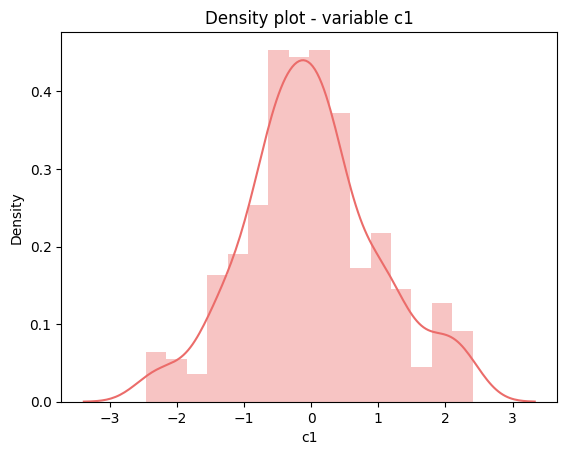

C:\Users\aleks\AppData\Local\Temp\ipykernel_11688\540614336.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.c2, color = '#eb6c6a').set(title = 'Density plot - variable c2')


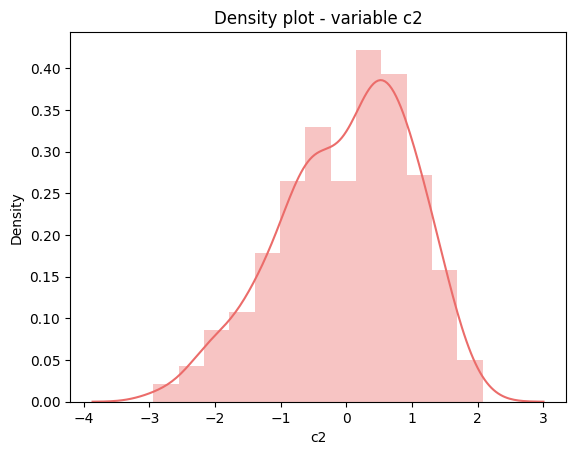

C:\Users\aleks\AppData\Local\Temp\ipykernel_11688\540614336.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.c3, color = '#eb6c6a').set(title = 'Density plot - variable c3')


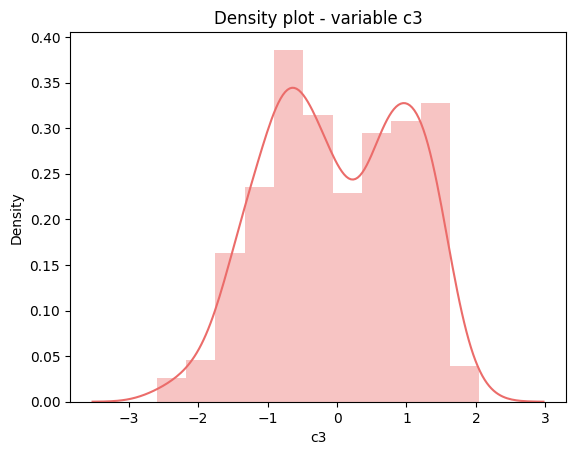

In [72]:
sns.distplot(df.c1, color = '#eb6c6a').set(title = 'Density plot - variable c1')
plt.show()
sns.distplot(df.c2, color = '#eb6c6a').set(title = 'Density plot - variable c2')
plt.show()
sns.distplot(df.c3, color = '#eb6c6a').set(title = 'Density plot - variable c3')
plt.show()

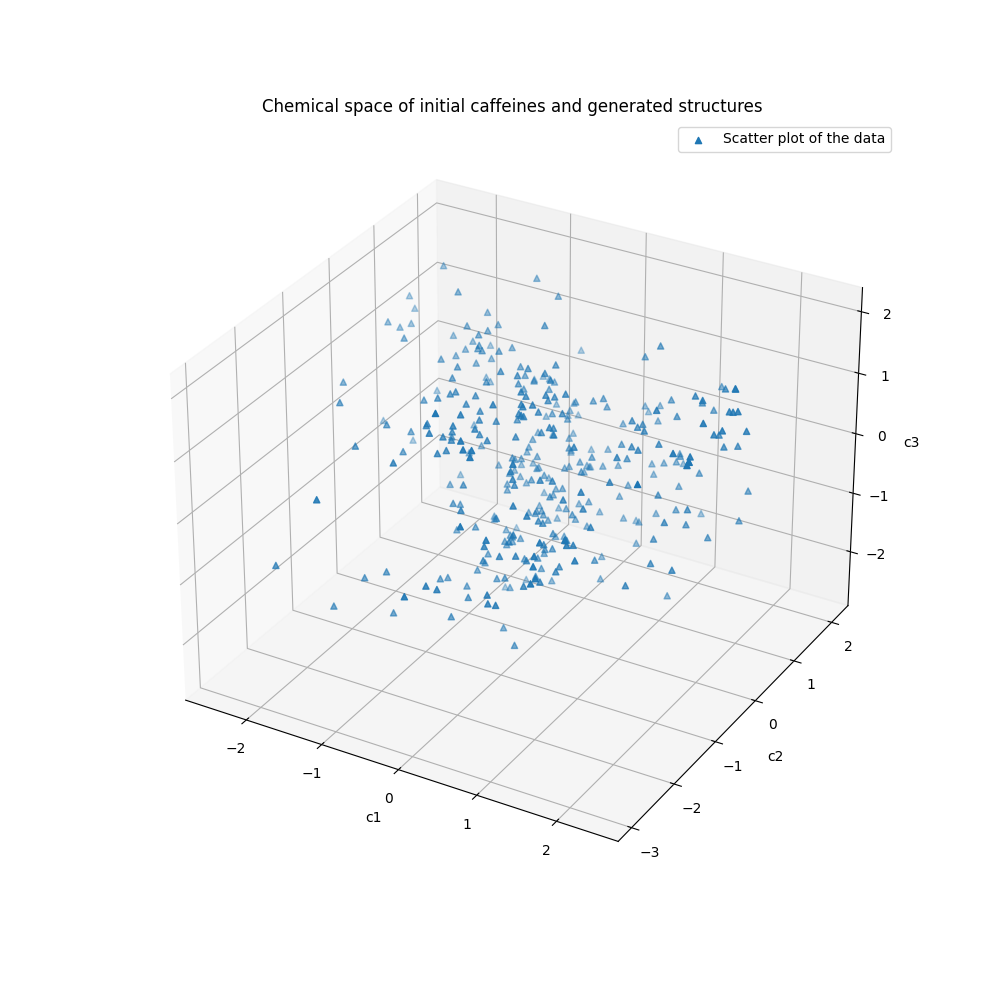

In [73]:
%matplotlib widget
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(df.c1, df.c2, df.c3, marker='^')
ax.legend(['Scatter plot of the data'])
ax.set_title('Chemical space of initial caffeines and generated structures')
ax.set_xlabel('c1')
ax.set_ylabel('c2')
ax.set_zlabel('c3')
#plt.show()
plt.ion()

In [74]:
model_1 = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=10).fit(df)

C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [75]:
df['label_1'] = model_1.labels_

In [76]:
df.head()

,c1,c2,c3,label_1
0,-0.948428,-1.738841,0.709367,6
1,-0.036533,0.173703,-1.078329,7
2,0.687678,-0.874352,-0.920034,4
3,0.738685,0.952978,-1.307731,5
4,1.234977,-1.519576,-0.200722,4


In [77]:
bins = [i for i in range(10)]

In [78]:
bins

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [79]:
dfv = pd.DataFrame(data=bins, columns=['BINS'])

In [80]:
df.iloc[2]['label_1']

4.0

In [81]:
list_of_names = []
for i in range(len(bins)):
    list_of_names.append('df_'+str(i))

In [82]:
for i in range(len(bins)):
    list_of_names[i] = pd.DataFrame()

In [83]:
pd.DataFrame(df.iloc[2:5])

,c1,c2,c3,label_1
2,0.687678,-0.874352,-0.920034,4
3,0.738685,0.952978,-1.307731,5
4,1.234977,-1.519576,-0.200722,4


In [84]:
label_0 = df.loc[df['label_1'] == 1]

In [85]:
label_0.head()

,c1,c2,c3,label_1
64,-1.144532,0.033668,1.154218,1
65,-1.387966,1.154820,1.335019,1
73,-0.856232,0.485333,1.251448,1
85,-0.803758,0.100173,0.987387,1
95,-1.496987,0.826235,0.874007,1


In [86]:
for i in range(len(list_of_names)):
    list_of_names[i] = df.loc[df['label_1'] == i]

In [87]:
for i in range(len(bins)):
    print('Label '+ str(i) + ' ', str(list_of_names[i].shape))

Label 0  (36, 4)
Label 1  (41, 4)
Label 2  (30, 4)
Label 3  (51, 4)
Label 4  (47, 4)
Label 5  (25, 4)
Label 6  (33, 4)
Label 7  (55, 4)
Label 8  (31, 4)
Label 9  (13, 4)


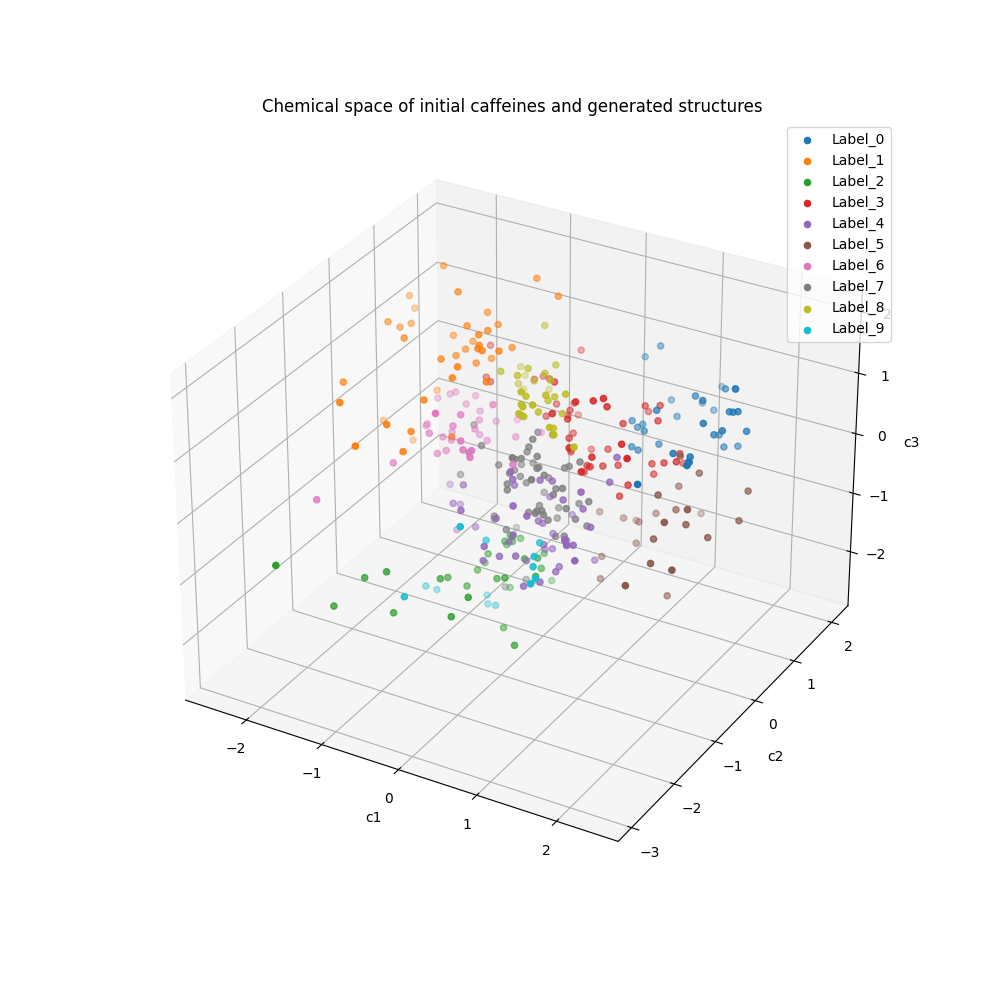

In [88]:
%matplotlib widget
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

for element in list_of_names:
    ax.scatter(element.c1, element.c2, element.c3)
#ax.scatter(df.c1, df.c2, df.c3, marker='^')
legend = []
for i in range(len(list_of_names)):
    legend.append('Label_'+ str(i))
    
ax.legend(legend)
ax.set_title('Chemical space of initial caffeines and generated structures')
ax.set_xlabel('c1')
ax.set_ylabel('c2')
ax.set_zlabel('c3')
#plt.show()
plt.ion()